In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter, sobel, maximum_filter

def harris_corners(image, window_size=3, k=0.04, threshold=0.01):
    """
    Harris Corner Detector implementation.
    
    Parameters:
    - image: Input grayscale image as a 2D numpy array.
    - window_size: Size of the window for non-maximum suppression (must be odd).
    - k: Harris detector parameter (typically between 0.04 and 0.06).
    - threshold: Threshold for corner detection (value between 0 and 1).
    
    Returns:
    - corners: Array of corner positions as (row, col) coordinates.
    - R: Harris response image.
    """
    # Ensure the image is in float32 format for precision
    img = np.float32(image)
    
    # Compute image gradients along x and y directions using Sobel operator
    Ix = sobel(img, axis=1, mode='reflect')  # Gradient in x-direction
    Iy = sobel(img, axis=0, mode='reflect')  # Gradient in y-direction
    
    # Compute products of derivatives at every pixel
    Ix2 = Ix ** 2      # I_x^2
    Iy2 = Iy ** 2      # I_y^2
    Ixy = Ix * Iy      # I_x * I_y
    
    # Apply Gaussian filter to the derivative products
    Sx2 = gaussian_filter(Ix2, sigma=1)
    Sy2 = gaussian_filter(Iy2, sigma=1)
    Sxy = gaussian_filter(Ixy, sigma=1)
    
    # Compute the determinant and trace of the Harris matrix M
    detM = (Sx2 * Sy2) - (Sxy ** 2)
    traceM = Sx2 + Sy2
    
    # Compute the Harris response R = det(M) - k * (trace(M))^2
    R = detM - k * (traceM ** 2)
    
    # Normalize the response for thresholding
    R = R / R.max()
    
    # Threshold on R to find significant corners
    R[R < threshold] = 0
    
    # Perform non-maximum suppression in the local neighborhood
    size = window_size
    R_max = maximum_filter(R, size=size)
    corner_peaks = (R == R_max) & (R > 0)
    
    # Extract coordinates of corners
    corners = np.argwhere(corner_peaks)
    
    return corners, R




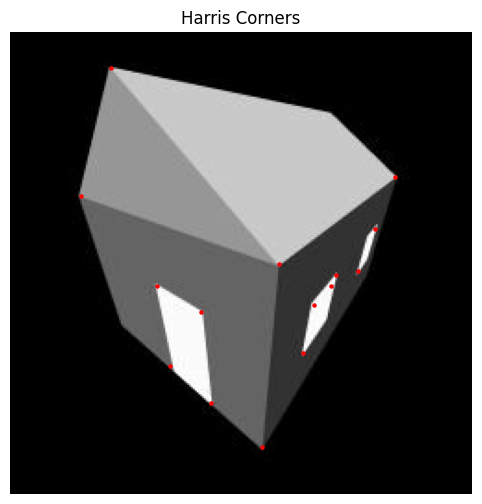

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load a grayscale image
image = mpimg.imread('data\left.jpg')


# Detect corners
corners, R = harris_corners(image)

# Plot the original image with corners marked
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], c='r', s=5)
plt.title('Harris Corners')
plt.axis('off')
plt.show()


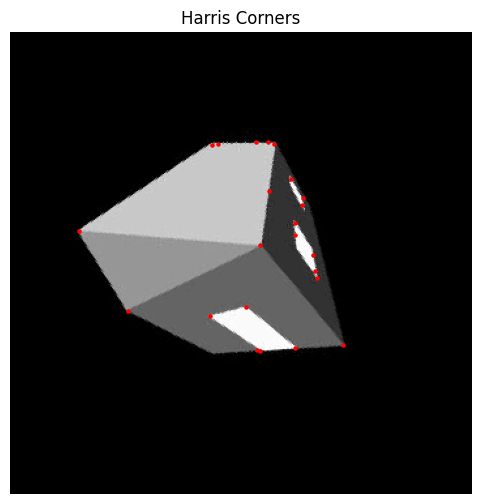

In [6]:
## Rotate image 45 degrees and do it again 

from PIL import Image

# Open an image file
image = Image.open('data\left.jpg')

# Rotate the image by 45 degrees
rotated_image = image.rotate(45, expand=True)


# Detect corners
corners, R = harris_corners(rotated_image)

# Plot the original image with corners marked
plt.figure(figsize=(8, 6))
plt.imshow(rotated_image, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], c='r', s=5)
plt.title('Harris Corners')
plt.axis('off')
plt.show()


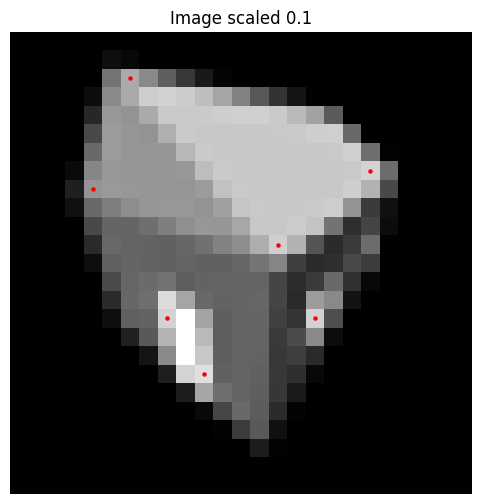

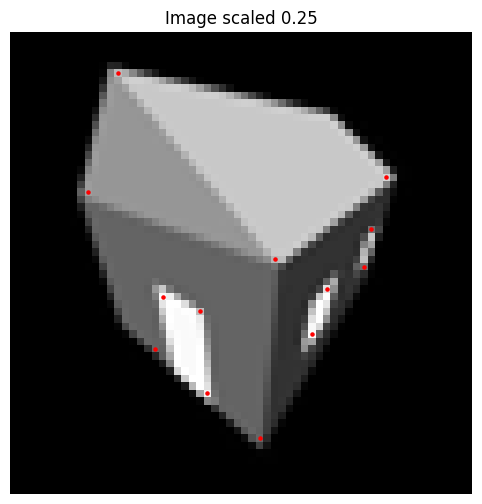

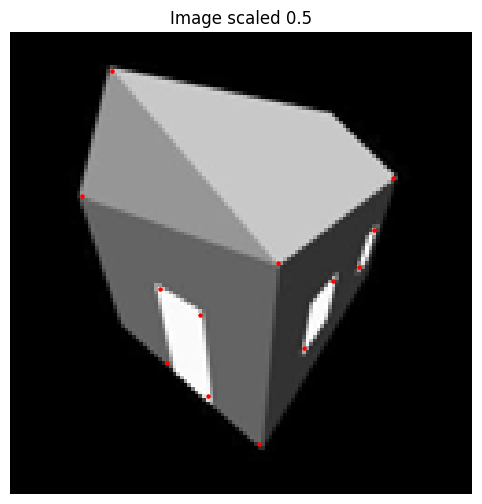

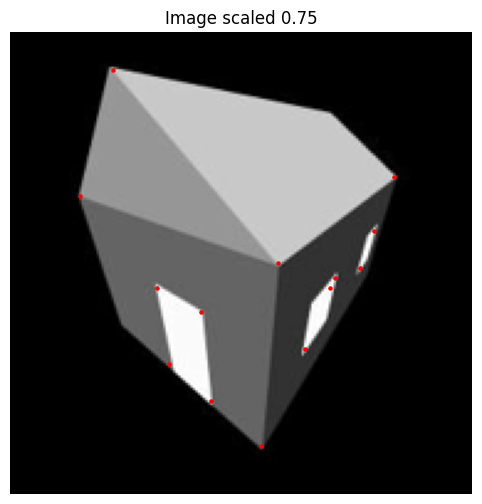

In [12]:
def image_scaler(image,scaling_factor):
    new_width = int(image.width * scaling_factor)
    new_height = int(image.height * scaling_factor)
    return image.resize((new_width, new_height))


def scale_and_plot_image(image,scaling_factor):
    scaled_image = image_scaler(image,scaling_factor)

    corners_scaled, R = harris_corners(scaled_image)

    plt.figure(figsize=(8, 6))
    plt.imshow(scaled_image, cmap='gray')
    plt.scatter(corners_scaled[:, 1], corners_scaled[:, 0], c='r', s=5)
    plt.title(f'Image scaled {scaling_factor}')
    plt.axis('off')
    plt.show()


scaling_factors = [0.1,0.25,0.5,0.75]

for scaling in scaling_factors:
    scale_and_plot_image(image,scaling)


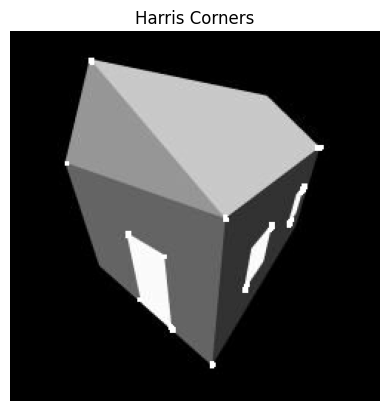

In [13]:
### Try the builtin harris detector from opencv

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('data\left.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to float32
gray = np.float32(image)

# Apply the Harris corner detector
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Result is dilated to mark the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value; it may vary depending on the image
image[dst > 0.01 * dst.max()] = 255

# Display the corners on the original image
plt.imshow(image, cmap='gray')
plt.title('Harris Corners')
plt.axis('off')
plt.show()


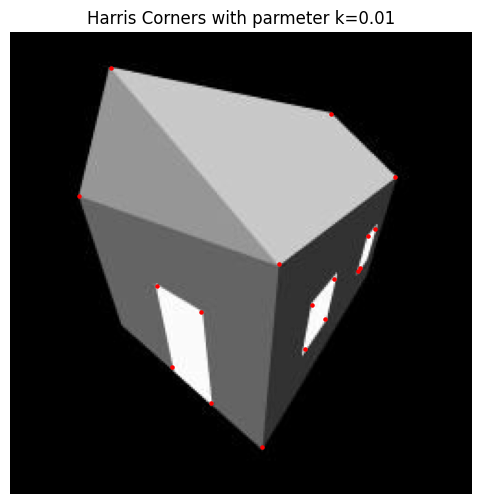

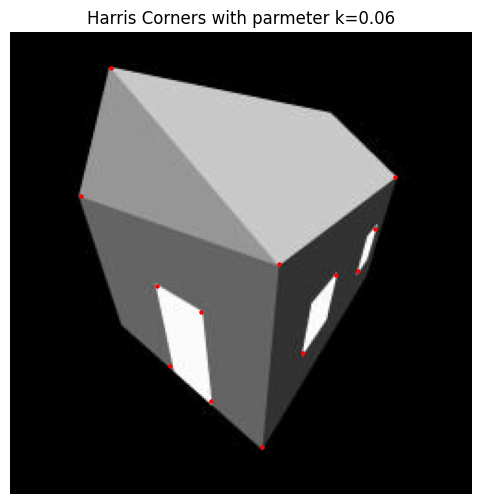

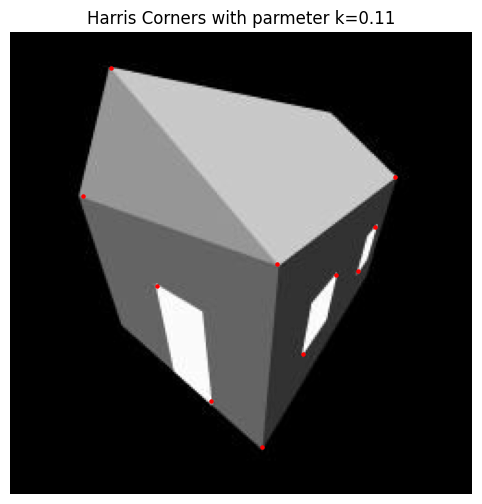

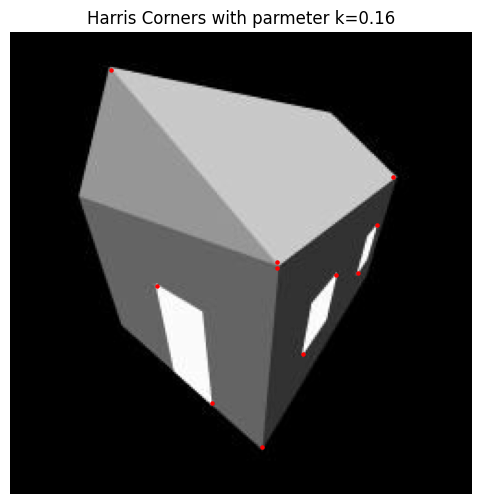

In [35]:
import numpy as np
## Change parameters of the harris detector (self-built)
def plot_varying_parameters(image,k=0.04,threshold=0.01,window_size=3,param = 'k'):
    corners, R = harris_corners(image,k=k,window_size=window_size,threshold=threshold)

    # Plot the original image with corners marked
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.scatter(corners[:, 1], corners[:, 0], c='r', s=5)
    if param == 'k':
        plot_num = k
    elif param == 'window_size':
        plot_num = window_size
    else:
        plot_num = threshold
    title = f'Harris Corners with parmeter {param}={np.round(plot_num,2)}'
    plt.title(title)
    plt.axis('off')
    plt.show()

#Change K 
image = Image.open('data\left.jpg')
for k in np.arange(0.01,0.2,0.05):
    plot_varying_parameters(image,k=k,param = 'k')

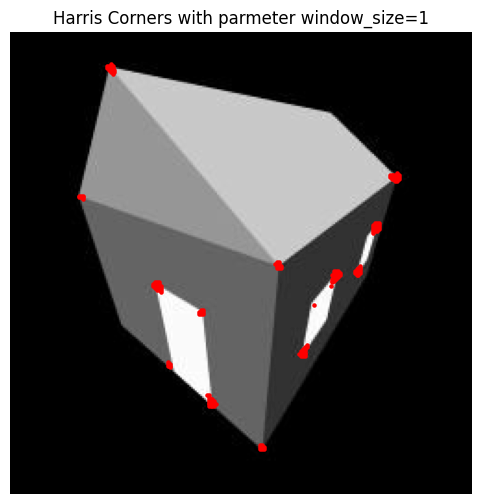

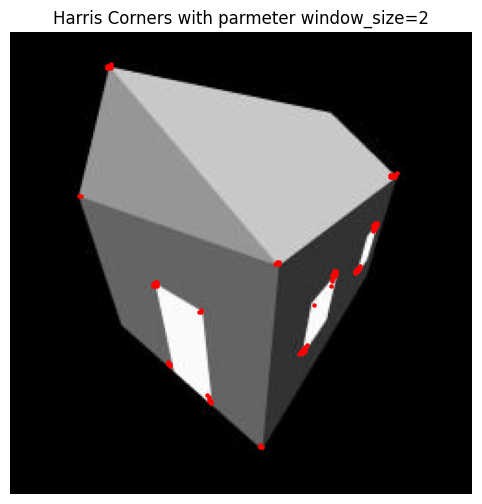

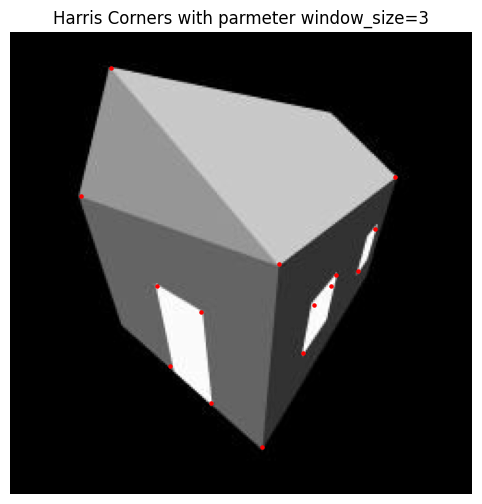

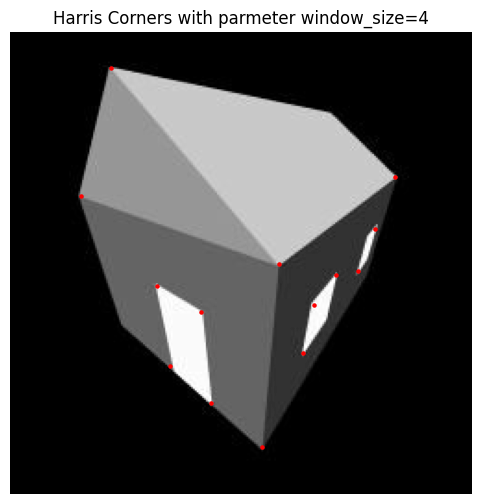

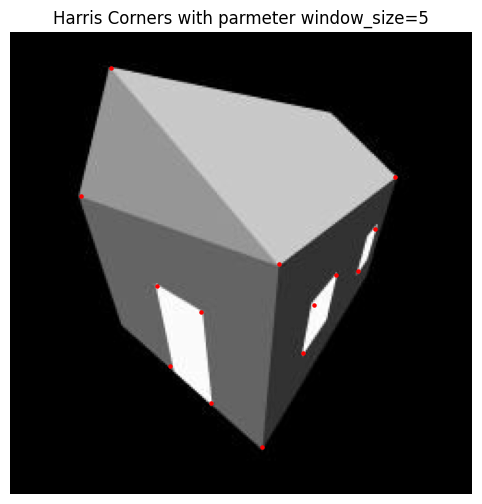

In [37]:
for window_size in np.arange(1,6,1):
    plot_varying_parameters(image,window_size=window_size,param = 'window_size')

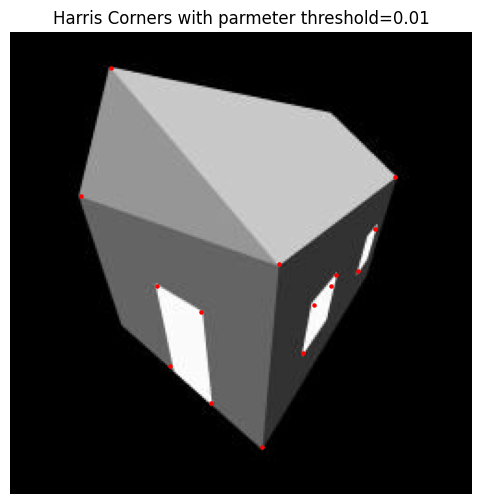

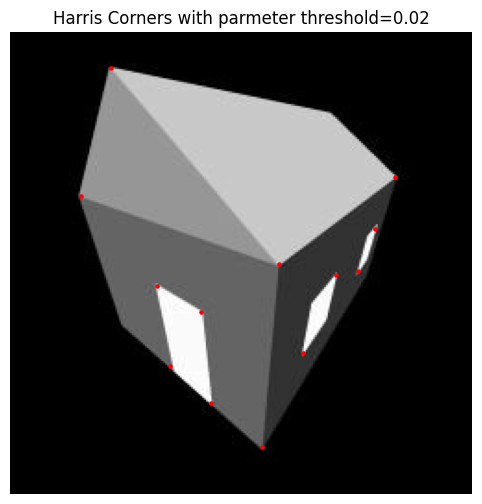

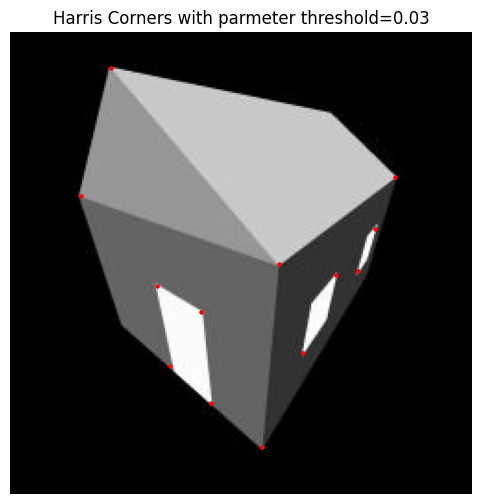

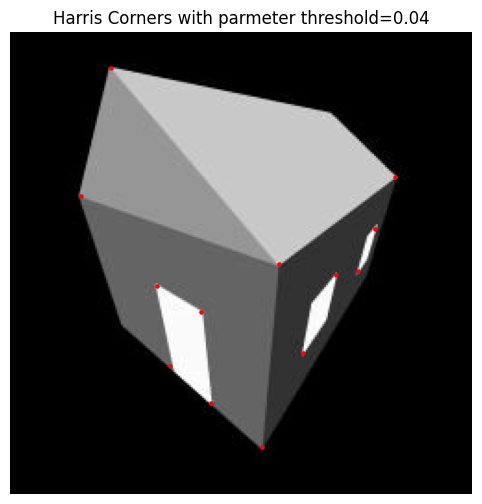

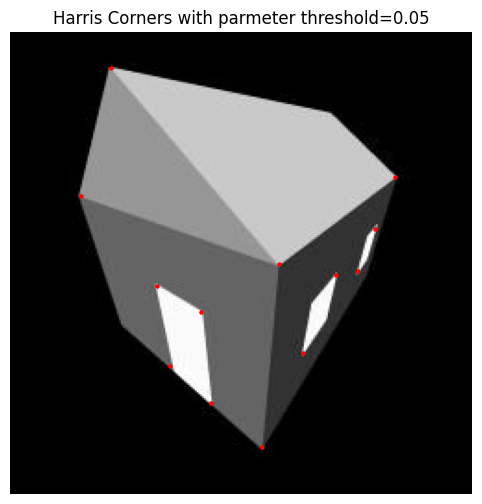

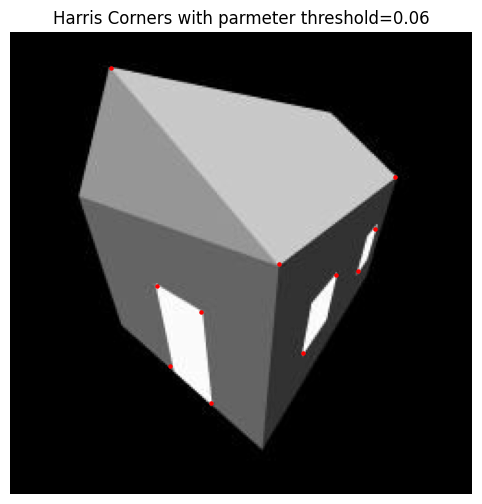

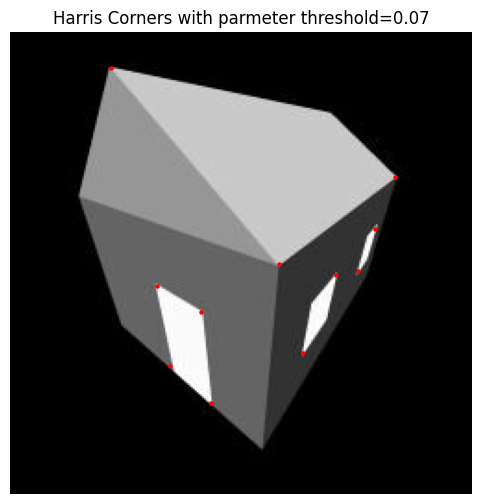

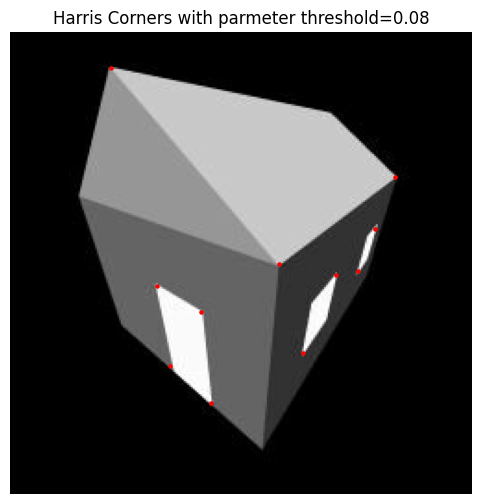

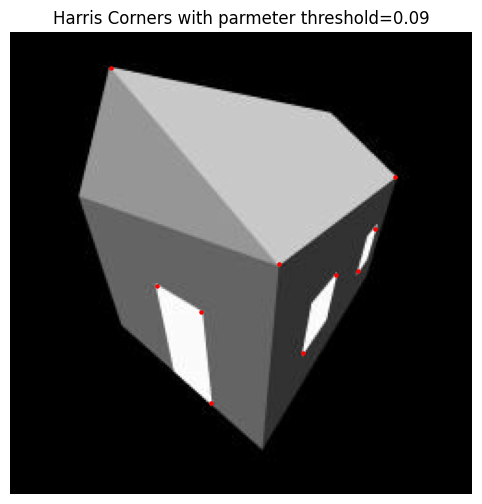

In [40]:
for threshold in np.arange(0.01,0.1,0.01):
    plot_varying_parameters(image,threshold=threshold,param = 'threshold')